### 广播（Broadcasting）
术语广播（Broadcasting）描述了 numpy 如何在算术运算期间处理具有不同形状的数组。受某些约束的影响，较小的数组在较大的数组上“广播”，以便它们具有兼容的形状。广播提供了一种矢量化数组操作的方法，以便在C而不是Python中进行循环。它可以在不制作不必要的数据副本的情况下实现这一点，通常导致高效的算法实现。然而，有些情况下广播是一个坏主意，因为它会导致内存使用效率低下，从而减慢计算速度。

NumPy 操作通常在逐个元素的基础上在数组对上完成。在最简单的情况下，两个数组必须具有完全相同的形状，如下例所示：

In [1]:
import numpy as np
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
print(a * b)

[2. 4. 6.]


当数组的形状满足某些约束时，NumPy的广播规则放宽了这种约束。当一个数组和一个标量值在一个操作中组合时，会发生最简单的广播示例：

In [2]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
print(a * b)

[2. 4. 6.]


结果等同于前面的例子，其中b是一个数组。我们可以认为标量在算术运算期间b被拉伸成与 具有相同形状的数组a。中的新元素 b，如图 1所示，只是原始标量的副本。拉伸类比只是概念性的。NumPy 足够聪明，可以使用原始标量值而无需实际制作副本，因此广播操作尽可能地占用内存和计算效率。


![图 1](https://numpy.org/devdocs/_images/broadcasting_1.png)


在最简单的广播示例中，标量 b 被拉伸成一个形状相同的数组， a 因此这些形状与逐个元素的乘法兼容。

第二个示例中的代码比第一个示例中的代码更有效，因为广播在乘法期间移动的内存更少（b是标量而不是数组）。



#### 1.一般广播规则
当对两个数组进行操作时，NumPy 会逐元素比较它们的形状。它从尾随（即最右边）维度开始，然后向左工作。两个维度兼容时

+ 他们是平等的，或者
+ 其中之一是 1

如果不满足这些条件， 则会引发异常，指示数组具有不兼容的形状。结果数组的大小是沿输入的每个轴不为 1 的大小。ValueError: operands could not be broadcast together

数组不需要具有相同的维数。例如，如果您有一个256x256x3RGB 值数组，并且希望将图像中的每种颜色按不同的值缩放，则可以将图像乘以具有 3 个值的一维数组。根据广播规则排列这些数组的尾轴大小，表明它们是兼容的：
```python
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```
当比较的任何一个尺寸为1时，使用另一个尺寸。换句话说，尺寸为1的尺寸被拉伸或“复制”以匹配另一个尺寸。

在以下示例中，A和B数组都具有长度为1的轴，在广播操作期间会扩展为更大的大小

```python
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```
以下是一些例子：
```python
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4

A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4

A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5

A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```
以下是不广播的形状示例：
```python
A      (1d array):  3
B      (1d array):  4 # trailing dimensions do not match

A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # second from last dimensions mismatched
```
实践中广播的一个例子：

In [7]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))
print(x.shape)
print(y.shape)
# print(x + y)
print(xx.shape)
print(y.shape)
print((xx + y).shape)
print(xx + y)
print(x.shape)
print(z.shape)
print((x + z).shape)
print(x+z)

(4,)
(5,)
(4, 1)
(5,)
(4, 5)
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
(4,)
(3, 4)
(3, 4)
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


广播提供了一种方便的方式来获取两个数组的外积（或任何其他外部操作）。以下示例显示了两个1-d数组的外积操作：

In [10]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
print(a[:, np.newaxis] + b)


[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]
None


这里 newaxis 索引操作符插入一个新轴 a ，使其成为一个二维 4x1 数组。将 4x1 数组与形状为 (3,) 的 b 组合，产生一个4x3数组。

In [36]:
import numpy as np
from numpy import random
# X = random.rand(10, 2)

X=np.array([[1, 2, 3, 4, 6, 5, 7],[1, 2, 3, 4, 5, 6, 7]])

X=X.T
# print(X.shape)
# print(X[:,np.newaxis,:])
# print(X[np.newaxis,:,:])
print("ssss\n",(X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2)

dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
print("dist_sq\n",dist_sq)
print(dist_sq.shape)

ssss
 [[[ 0  0]
  [ 1  1]
  [ 4  4]
  [ 9  9]
  [25 16]
  [16 25]
  [36 36]]

 [[ 1  1]
  [ 0  0]
  [ 1  1]
  [ 4  4]
  [16  9]
  [ 9 16]
  [25 25]]

 [[ 4  4]
  [ 1  1]
  [ 0  0]
  [ 1  1]
  [ 9  4]
  [ 4  9]
  [16 16]]

 [[ 9  9]
  [ 4  4]
  [ 1  1]
  [ 0  0]
  [ 4  1]
  [ 1  4]
  [ 9  9]]

 [[25 16]
  [16  9]
  [ 9  4]
  [ 4  1]
  [ 0  0]
  [ 1  1]
  [ 1  4]]

 [[16 25]
  [ 9 16]
  [ 4  9]
  [ 1  4]
  [ 1  1]
  [ 0  0]
  [ 4  1]]

 [[36 36]
  [25 25]
  [16 16]
  [ 9  9]
  [ 1  4]
  [ 4  1]
  [ 0  0]]]
dist_sq
 [[ 0  2  8 18 41 41 72]
 [ 2  0  2  8 25 25 50]
 [ 8  2  0  2 13 13 32]
 [18  8  2  0  5  5 18]
 [41 25 13  5  0  2  5]
 [41 25 13  5  2  0  5]
 [72 50 32 18  5  5  0]]
(7, 7)


[[0 1 2 3 4 5 6]
 [1 0 2 3 4 5 6]
 [2 1 3 0 4 5 6]
 [3 2 4 5 1 0 6]
 [4 5 3 6 2 1 0]
 [5 4 3 6 2 1 0]
 [6 4 5 3 2 1 0]]


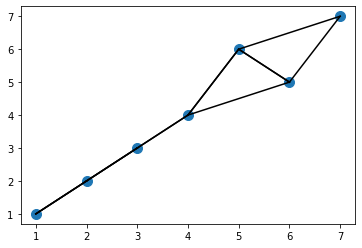

In [41]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=100)
# 将每个点与它的两个最近邻连接
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现：
        plt.plot(*zip(X[j], X[i]), color='black')